In [1]:
from nuplan.common.maps.nuplan_map.map_factory import get_maps_api, get_maps_db

MAP_LOCATIONS = {"sg-one-north", "us-ma-boston", "us-nv-las-vegas-strip", "us-pa-pittsburgh-hazelwood"}

In [2]:
import geopandas as gpd
import pyogrio


# Path to your .gpkg file
path_to_gpkg = "/home/daniel/nuplan/dataset/maps/us-pa-pittsburgh-hazelwood/9.17.1937/map.gpkg"

# List all available layers
layers = [
    "baseline_paths",
    "carpark_areas",
    "generic_drivable_areas",
    "dubins_nodes",
    "lane_connectors",
    "intersections",
    "boundaries",
    "crosswalks",
    "lanes_polygons",
    "lane_group_connectors",
    "lane_groups_polygons",
    "road_segments",
    "stop_polygons",
    "traffic_lights",
    "walkways",
    "gen_lane_connectors_scaled_width_polygons",
    "meta",
]


def load_layer(layer_name: str) -> gpd.geodataframe:


    map_meta = gpd.read_file(path_to_gpkg, layer="meta", engine="pyogrio")
    projection_system = map_meta[map_meta["key"] == "projectedCoordSystem"]["value"].iloc[0]

    gdf_in_pixel_coords = pyogrio.read_dataframe(path_to_gpkg, layer=layer_name, fid_as_index=True)
    gdf_in_utm_coords = gdf_in_pixel_coords.to_crs(projection_system)

    # For backwards compatibility, cast the index to string datatype.
    #   and mirror it to the "fid" column.
    gdf_in_utm_coords.index = gdf_in_utm_coords.index.map(str)
    gdf_in_utm_coords["fid"] = gdf_in_utm_coords.index

    return gdf_in_utm_coords



In [25]:

import pandas as pd
lane_df =  load_layer("lanes_polygons")
lane_df

,lane_group_fid,lane_fid,lane_index,creator_id,name,road_type_fid,lane_type_fid,width,left_offset,right_offset,...,stops,left_boundary_fid,right_boundary_fid,speed_limit_mps,left_has_reflectors,right_has_reflectors,from_edge_fid,to_edge_fid,geometry,fid
fid,,,,,,,,,,,,,,,,,,,,,
18109,18942,18109,1,083b50ef-4d14-45c1-8f18-c30dc645720b,None,1,0,12,NaN,NaN,...,NaN,17718,23624,11.175682,False,False,21699,21700,"POLYGON ((589136.541 4474152.925, 589138.943 4...",18109
18111,18955,18111,1,f1326f93-afec-4671-ab2e-46d89192042a,None,1,0,12,NaN,NaN,...,NaN,23626,23628,11.175682,False,False,21701,21702,"POLYGON ((589115.35 4474139.311, 589114.494 44...",18111
18113,18966,18113,1,5b8f89b8-7f12-405c-84bc-aeb8a3681e0d,None,1,0,12,NaN,NaN,...,NaN,17718,23630,11.175682,False,False,21703,21704,"POLYGON ((589137.456 4474149.571, 589142.687 4...",18113
18115,18961,18115,1,536e6b67-e2db-4dbb-b3ac-7a7e083db61d,None,1,0,12,NaN,NaN,...,NaN,17734,23632,11.175682,False,False,21705,21706,"POLYGON ((589092.537 4474635.153, 589095.78 44...",18115
18117,18953,18117,1,4ce15945-c264-4c2d-b413-e350eae61f0b,None,1,0,12,NaN,NaN,...,NaN,17732,23634,6.705409,False,False,21707,21708,"POLYGON ((589125.391 4474495.449, 589125.978 4...",18117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19938,19213,19938,1,db61379c-e71c-4328-ae69-d302f03dae0b,None,1,0,12,NaN,NaN,...,NaN,24316,24318,6.705409,False,False,22425,22426,"POLYGON ((587754.56 4475546.967, 587772.699 44...",19938
19939,19210,19939,1,e551db67-d65d-44b2-8acc-5381da09cece,None,1,0,12,NaN,NaN,...,NaN,24320,24322,6.705409,False,False,22427,22428,"POLYGON ((587751.091 4475557.099, 587748.204 4...",19939
19940,19215,19940,1,e7b56395-b436-48d8-94cc-46c981e2c461,None,1,0,12,NaN,NaN,...,NaN,18098,18094,11.175682,False,False,22429,22430,"POLYGON ((587770.728 4475553.878, 587771.616 4...",19940


In [19]:
lane_connectors_df =  load_layer("lane_connectors")
lane_connectors_df

,exit_lane_group_fid,exit_lane_fid,entry_lane_group_fid,lane_group_connector_fid,entry_lane_fid,intersection_fid,turn_type_fid,bulb_fids,traffic_light_stop_line_fids,overlap,creator_id,reflector_side_fid,left_has_reflectors,right_has_reflectors,speed_limit_mps,geometry,fid
fid,,,,,,,,,,,,,,,,,
18105,19051,18309,19052,19469,19830,17628,0,,,NaN,c542ec82-6e25-4e47-aa63-701651907018,0,False,False,11.175682,"LINESTRING (587805.615 4475847.068, 587805.424...",18105
18106,19051,18308,19052,19469,19830,17628,0,,,NaN,e0ece056-9193-4812-8fa1-fb127ecdcc63,0,False,False,11.175682,"LINESTRING (587810.334 4475847.41, 587810.142 ...",18106
18123,18966,18113,18944,19265,19759,17578,1,,,NaN,5632d7ac-71c2-45ad-b51b-a6d349dc3a45,0,False,False,11.175682,"LINESTRING (589242.153 4474176.99, 589242.395 ...",18123
18128,18961,18115,18959,19293,18121,17583,1,,,NaN,aa4b945b-8660-44fb-b116-e08e5cbd1f54,0,False,False,11.175682,"LINESTRING (589094.353 4474635.377, 589094.266...",18128
18133,18950,19760,18963,19297,19748,17584,1,,,NaN,d4fb4cbe-f3ae-44af-996b-d75ba09a3579,0,False,False,6.705409,"LINESTRING (589153.427 4474490.543, 589153.284...",18133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,19029,19817,19215,19720,19940,17709,0,,,NaN,be4b4f93-9eaa-4a63-98f6-0eef223e9577,0,False,False,11.175682,"LINESTRING (587743.318 4475570.843, 587743.508...",20395
20396,19218,19937,19087,19726,18538,17709,0,,,NaN,d8ca2941-4a81-4be6-bcab-226313a40cb5,0,False,False,11.175682,"LINESTRING (587773.222 4475556.784, 587773.031...",20396
20397,19218,19936,19087,19726,18537,17709,0,,,NaN,21ac6f09-3aa0-4aa8-933b-1f84ca15fec2,0,False,False,11.175682,"LINESTRING (587771.843 4475555.028, 587771.652...",20397


In [24]:

gen_lane_connectors_scaled_width_polygons_df = load_layer("gen_lane_connectors_scaled_width_polygons")

gen_lane_connectors_scaled_width_polygons_df

,baseline_path_fid,lane_connector_fid,from_edge_fid,to_edge_fid,left_boundary_fid,right_boundary_fid,geometry,fid
fid,,,,,,,,
27309,20771,20029,22881,22882,25220,25222,"POLYGON ((589131.754 4474137.499, 589131.577 4...",27309
27310,20777,20030,22883,22884,25224,25226,"POLYGON ((589339.321 4473881.487, 589339.624 4...",27310
27311,20780,20031,22885,22886,25228,25230,"POLYGON ((589363.829 4473892.452, 589363.667 4...",27311
27312,20781,20032,22887,22888,25232,25234,"POLYGON ((589363.826 4473892.45, 589363.66 447...",27312
27313,21194,18568,22553,22554,24564,24566,"POLYGON ((587743.071 4475594.541, 587742.918 4...",27313
...,...,...,...,...,...,...,...,...
27898,21433,18838,22649,22650,24756,24758,"POLYGON ((587390.979 4475767.959, 587390.962 4...",27898
27899,20975,18345,22489,22490,24436,24438,"POLYGON ((588093.197 4475435.459, 588094.104 4...",27899
27900,21625,18728,22633,22634,24724,24726,"POLYGON ((589106.055 4474069.845, 589106.154 4...",27900


In [28]:
(594+368)*2

1924

In [26]:
import pandas as pd
lane_df =  load_layer("boundaries")
lane_df

,boundary_segment_fids,has_reflectors,boundary_type_fid,creator_id,geometry,fid
fid,,,,,,
17710,17711,False,0,67117bc9-dd05-411f-94c4-91c075f905f1,"LINESTRING (589087.946 4474064.767, 589071.105...",17710
17712,17713,False,2,14a8ff98-f2c4-4891-ac79-ab7153aad165,"LINESTRING (589253.006 4473877.042, 589248.732...",17712
17714,17715,False,2,2644203d-2918-4360-9c22-75d3df50a7c6,"LINESTRING (589254.796 4474172.051, 589255.493...",17714
17716,17717,False,0,3aef66b9-efd7-4df4-acab-21a2fc3fa2b3,"LINESTRING (589337.014 4473887.89, 589334.238 ...",17716
17718,17719,False,2,66ff7cd2-19d8-4638-a5e0-0255ad95fd35,"LINESTRING (589242.041 4474178.807, 589237.85 ...",17718
...,...,...,...,...,...,...
35864,35863,False,3,None,"LINESTRING (587844.228 4475509.469, 587843.667...",35864
35870,35869,False,3,None,"LINESTRING (587749.072 4475568.954, 587749.156...",35870
35872,35871,False,3,None,"LINESTRING (587744.011 4475563.157, 587751.091...",35872


In [6]:
def mps_to_mph(mph: float) -> float:
    """
    Convert meters per second to miles per hour.
    :param mph: miles per hour [mi/h]
    :return: meters per second [m/s]
    """
    return mph / 0.44704
mps_to_mph(6.705409029950827)

14.99957281216631

In [7]:
# fix, ax = plt.subplots(figsize=(10, 10))

# type = 3

# for i in np.random.choice(len(geoms[type]), 10):
#     ax.plot(*geoms[type][i].coords.xy, color="blue")


In [8]:
geoms[2][1]

NameError: name 'geoms' is not defined

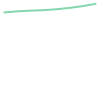

In [ ]:
geoms[3][1]